In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [8]:
data = pd.read_excel("NA_Ret_Data_Clean_Sentiment_v2.xlsx", sheet_name = 0)

In [9]:
data.head()

,GVKEY IQ,gvkey,tic,datadate,YM,cik,CompanyName,Country,GICS_sector,GICS_industry_group,GICS_industry,NAICS_sector,NAICS_sub_sector,trt1m,marketcapUSD,sentiment,similarity
0,GV_001004,1004,AIR,01/31/1990,199001,1750,AAR CORP,USA,Industrials,Capital Goods,Aerospace & Defense,Wholesale Trade,"Merchant Wholesalers, Durable Goods",-0.121667,0,NaN,NaN
1,GV_001004,1004,AIR,02/28/1990,199002,1750,AAR CORP,USA,Industrials,Capital Goods,Aerospace & Defense,Wholesale Trade,"Merchant Wholesalers, Durable Goods",-0.011905,0,NaN,NaN
2,GV_001004,1004,AIR,03/31/1990,199003,1750,AAR CORP,USA,Industrials,Capital Goods,Aerospace & Defense,Wholesale Trade,"Merchant Wholesalers, Durable Goods",-0.036145,0,NaN,NaN
3,GV_001004,1004,AIR,04/30/1990,199004,1750,AAR CORP,USA,Industrials,Capital Goods,Aerospace & Defense,Wholesale Trade,"Merchant Wholesalers, Durable Goods",-0.279166,0,NaN,NaN
4,GV_001004,1004,AIR,05/31/1990,199005,1750,AAR CORP,USA,Industrials,Capital Goods,Aerospace & Defense,Wholesale Trade,"Merchant Wholesalers, Durable Goods",-0.011792,0,NaN,NaN


In [6]:
mapping = pd.read_excel("NA_Ret_Data_Clean_Sentiment_v2.xlsx", sheet_name = 1)
mapping.head()

,GVKEY IQ,gvkey,tic,fic,cik,conm,sector,industry_group,industry,sub_industry,sic,naics,NAICS6,NAICS2,NAICS3,Company Description
0,GV_001004,1004,AIR,USA,1750.0,AAR CORP,Industrials,Capital Goods,Aerospace & Defense,Aerospace & Defense,5080,423860,Transportation Equipment and Supplies (except ...,Wholesale Trade,"Merchant Wholesalers, Durable Goods",AAR Corp. provides products and services to co...
1,GV_001013,1013,ADCT.1,USA,61478.0,ADC TELECOMMUNICATIONS INC,Information Technology,Technology Hardware & Equipment,Communications Equipment,Communications Equipment,3661,334210,Telephone Apparatus Manufacturing,Manufacturing,Computer and Electronic Product Manufacturing,CommScope Connectivity LLC provides broadband ...
2,GV_001045,1045,AAL,USA,6201.0,AMERICAN AIRLINES GROUP INC,Industrials,Transportation,Airlines,Airlines,4512,481111,Scheduled Passenger Air Transportation,Transportation and Warehousing,Air Transportation,"American Airlines Group Inc., through its subs..."
3,GV_001075,1075,PNW,USA,764622.0,PINNACLE WEST CAPITAL CORP,Utilities,Utilities,Electric Utilities,Electric Utilities,4911,2211,"Electric Power Generation, Transmission and Di...",Utilities,Utilities,"Pinnacle West Capital Corporation, through its..."
4,GV_001076,1076,AAN,USA,706688.0,AARON'S INC,Consumer Discretionary,Retailing,Specialty Retail,Homefurnishing Retail,7359,532289,All Other Consumer Goods Rental,Real Estate and Rental and Leasing,Rental and Leasing Services,"Aaron's, Inc. operates as an omnichannel provi..."


In [390]:
# Transform monthly data from columns to rows
data_simple = data[['cik', 'datadate', 'similarity']]
data_simple['date'] = pd.to_datetime(data_simple['datadate'])
data_pivot = pd.pivot_table(data_simple, 
                        values=['similarity'],
                        index=['cik'],
                        columns=['date'],
                        aggfunc=np.sum,
                        fill_value=0)
data_pivot.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


similarity                                                         \
date 1990-01-31 1990-02-28 1990-03-31 1990-04-30 1990-05-31 1990-06-30   
cik                                                                      
0             0          0          0          0          0          0   
1750          0          0          0          0          0          0   
1800          0          0          0          0          0          0   
2034          0          0          0          0          0          0   
2135          0          0          0          0          0          0   

                                                  ...                        \
date 1990-07-31 1990-08-31 1990-09-30 1990-10-31  ... 2019-05-31 2019-06-30   
cik                                               ...                         
0             0          0          0          0  ...        0.0        0.0   
1750          0          0          0          0  ...        0.0        0.0   
1800          0          0          0          0  ...        0.0        0.0   
2034          0          0          0          0  ...        0.0        0.0   
2135          0          0          0          0  ...        0.0        0.0   

                                                                        \
date 2019-07-31 2019-08-31 2019-09-30 2019-10-31 2019-11-30 2019-12-31   
cik                                                                      
0        0.0000        0.0        0.0        0.0        0.0        0.0   
1750     0.9876        0.0        0.0        0.0        0.0        0.0   
1800     0.0000        0.0        0.0        0.0        0.0        0.0   
2034     0.0000        0.0        0.0        0.0        0.0        0.0   
2135     0.0000        0.0        0.0        0.0        0.0        0.0   

                            
date 2020-01-31 2020-02-29  
cik                         
0           0.0     0.0000  
1750        0.0     0.0000  
1800        0.0     0.9802  
2034        0.0     0.0000  
2135        0.0     0.0000  

[5 rows x 362 columns]

In [734]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
scaler.fit(data_pivot)
norm_data = pd.DataFrame(scaler.transform(data_pivot), index=data_pivot.index, columns=data_pivot.columns)
norm_data = norm_data.loc[:, (norm_data != 0).any(axis=0)]#Drops all columns with no data
norm_data = norm_data.iloc[:,184:244]
norm_data.head(20)

similarity                                                         \
date 2015-01-31 2015-02-28 2015-03-31 2015-04-30 2015-05-31 2015-06-30   
cik                                                                      
0           0.0   0.000000   0.000000        0.0        0.0        0.0   
1750        0.0   0.000000   0.000000        0.0        0.0        0.0   
1800        0.0   0.219427   0.000000        0.0        0.0        0.0   
2034        0.0   0.000000   0.000000        0.0        0.0        0.0   
2135        0.0   0.000000   0.000000        0.0        0.0        0.0   
2488        0.0   0.219022   0.000000        0.0        0.0        0.0   
2491        0.0   0.000000   0.000000        0.0        0.0        0.0   
2809        0.0   0.000000   0.000000        0.0        0.0        0.0   
2969        0.0   0.000000   0.000000        0.0        0.0        0.0   
3116        0.0   0.000000   0.222061        0.0        0.0        0.0   
3453        0.0   0.223934   0.000000        0.0        0.0        0.0   
3673        0.0   0.000000   0.000000        0.0        0.0        0.0   
4127        0.0   0.000000   0.000000        0.0        0.0        0.0   
4281        0.0   0.000000   0.000000        0.0        0.0        0.0   
4447        0.0   0.218517   0.000000        0.0        0.0        0.0   
4904        0.0   0.218218   0.000000        0.0        0.0        0.0   
4962        0.0   0.218582   0.000000        0.0        0.0        0.0   
4977        0.0   0.219608   0.000000        0.0        0.0        0.0   
5133        0.0   0.000000   0.000000        0.0        0.0        0.0   
5272        0.0   0.219183   0.000000        0.0        0.0        0.0   

                                                  ...                        \
date 2015-07-31 2015-08-31 2015-09-30 2015-10-31  ... 2019-03-31 2019-04-30   
cik                                               ...                         
0      0.000000        0.0   0.000000        0.0  ...   0.000000        0.0   
1750   0.222928        0.0   0.000000        0.0  ...   0.000000        0.0   
1800   0.000000        0.0   0.000000        0.0  ...   0.000000        0.0   
2034   0.000000        0.0   0.232728        0.0  ...   0.000000        0.0   
2135   0.000000        0.0   0.000000        0.0  ...   0.000000        0.0   
2488   0.000000        0.0   0.000000        0.0  ...   0.000000        0.0   
2491   0.000000        0.0   0.000000        0.0  ...   0.000000        0.0   
2809   0.000000        0.0   0.000000        0.0  ...   0.000000        0.0   
2969   0.000000        0.0   0.000000        0.0  ...   0.000000        0.0   
3116   0.000000        0.0   0.000000        0.0  ...   0.228670        0.0   
3453   0.000000        0.0   0.000000        0.0  ...   0.223483        0.0   
3673   0.000000        0.0   0.000000        0.0  ...   0.000000        0.0   
4127   0.000000        0.0   0.000000        0.0  ...   0.000000        0.0   
4281   0.000000        0.0   0.000000        0.0  ...   0.000000        0.0   
4447   0.000000        0.0   0.000000        0.0  ...   0.000000        0.0   
4904   0.000000        0.0   0.000000        0.0  ...   0.000000        0.0   
4962   0.000000        0.0   0.000000        0.0  ...   0.000000        0.0   
4977   0.000000        0.0   0.000000        0.0  ...   0.000000        0.0   
5133   0.000000        0.0   0.000000        0.0  ...   0.000000        0.0   
5272   0.000000        0.0   0.000000        0.0  ...   0.000000        0.0   

                                                                        \
date 2019-05-31 2019-06-30 2019-07-31 2019-08-31 2019-09-30 2019-10-31   
cik                                                                      
0           0.0        0.0   0.000000        0.0        0.0        0.0   
1750        0.0        0.0   0.227512        0.0        0.0        0.0   
1800        0.0        0.0   0.000000        0.0        0.0        0.0   
2034        0.0        0.0   0.000000   

In [735]:
def pca_results(good_data, pca, n):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''

    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = list(good_data.keys()))
    components.index = dimensions
    components_transpose = components.T
    
# Get the top 3 values 
    print ("top components %s for each dimension" %n)
    def sorted(s, num):
      tmp = s.sort_values(ascending=False)[:num]  # earlier s.order(..)
      tmp.index = range(num)
      return tmp
    top_values = components_transpose.apply(lambda x: sorted(x, n))
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        print(top_values)
    
#   top 3 values' index map
    a = np.argsort(components_transpose.values, axis=0)[-1:-1-n:-1]
    b = pd.DataFrame(components_transpose.index[a], columns=components_transpose.columns)
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        print(b)

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (25,15))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)


    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

top components 5 for each dimension
   Dimension 1  Dimension 2
0       0.4708       0.5192
1       0.4636       0.4882
2       0.4528       0.3878
3       0.4376       0.3878
4       0.3652       0.3658
                         Dimension 1                        Dimension 2
0  (similarity, 2018-02-28 00:00:00)  (similarity, 2017-03-31 00:00:00)
1  (similarity, 2019-02-28 00:00:00)  (similarity, 2018-03-31 00:00:00)
2  (similarity, 2017-02-28 00:00:00)  (similarity, 2019-03-31 00:00:00)
3  (similarity, 2016-02-29 00:00:00)  (similarity, 2015-03-31 00:00:00)
4  (similarity, 2015-02-28 00:00:00)  (similarity, 2016-03-31 00:00:00)


,Explained Variance,"(similarity, 2015-01-31 00:00:00)","(similarity, 2015-02-28 00:00:00)","(similarity, 2015-03-31 00:00:00)","(similarity, 2015-04-30 00:00:00)","(similarity, 2015-05-31 00:00:00)","(similarity, 2015-06-30 00:00:00)","(similarity, 2015-07-31 00:00:00)","(similarity, 2015-08-31 00:00:00)","(similarity, 2015-09-30 00:00:00)",...,"(similarity, 2019-03-31 00:00:00)","(similarity, 2019-04-30 00:00:00)","(similarity, 2019-05-31 00:00:00)","(similarity, 2019-06-30 00:00:00)","(similarity, 2019-07-31 00:00:00)","(similarity, 2019-08-31 00:00:00)","(similarity, 2019-09-30 00:00:00)","(similarity, 2019-10-31 00:00:00)","(similarity, 2019-11-30 00:00:00)","(similarity, 2019-12-31 00:00:00)"
Dimension 1,0.3313,-0.0059,0.3652,-0.0483,-0.0090,-0.0131,-0.0093,-0.0055,-0.0202,-0.0074,...,-0.0697,-0.0105,-0.0163,-0.0098,-0.0049,-0.0198,-0.0028,-0.0064,-0.0261,-0.0108
Dimension 2,0.1497,-0.0082,-0.0363,0.3878,0.0006,-0.0172,-0.0123,-0.0044,-0.0249,-0.0095,...,0.3878,0.0148,-0.0182,-0.0142,-0.0062,-0.0280,-0.0036,-0.0083,-0.0374,-0.0145


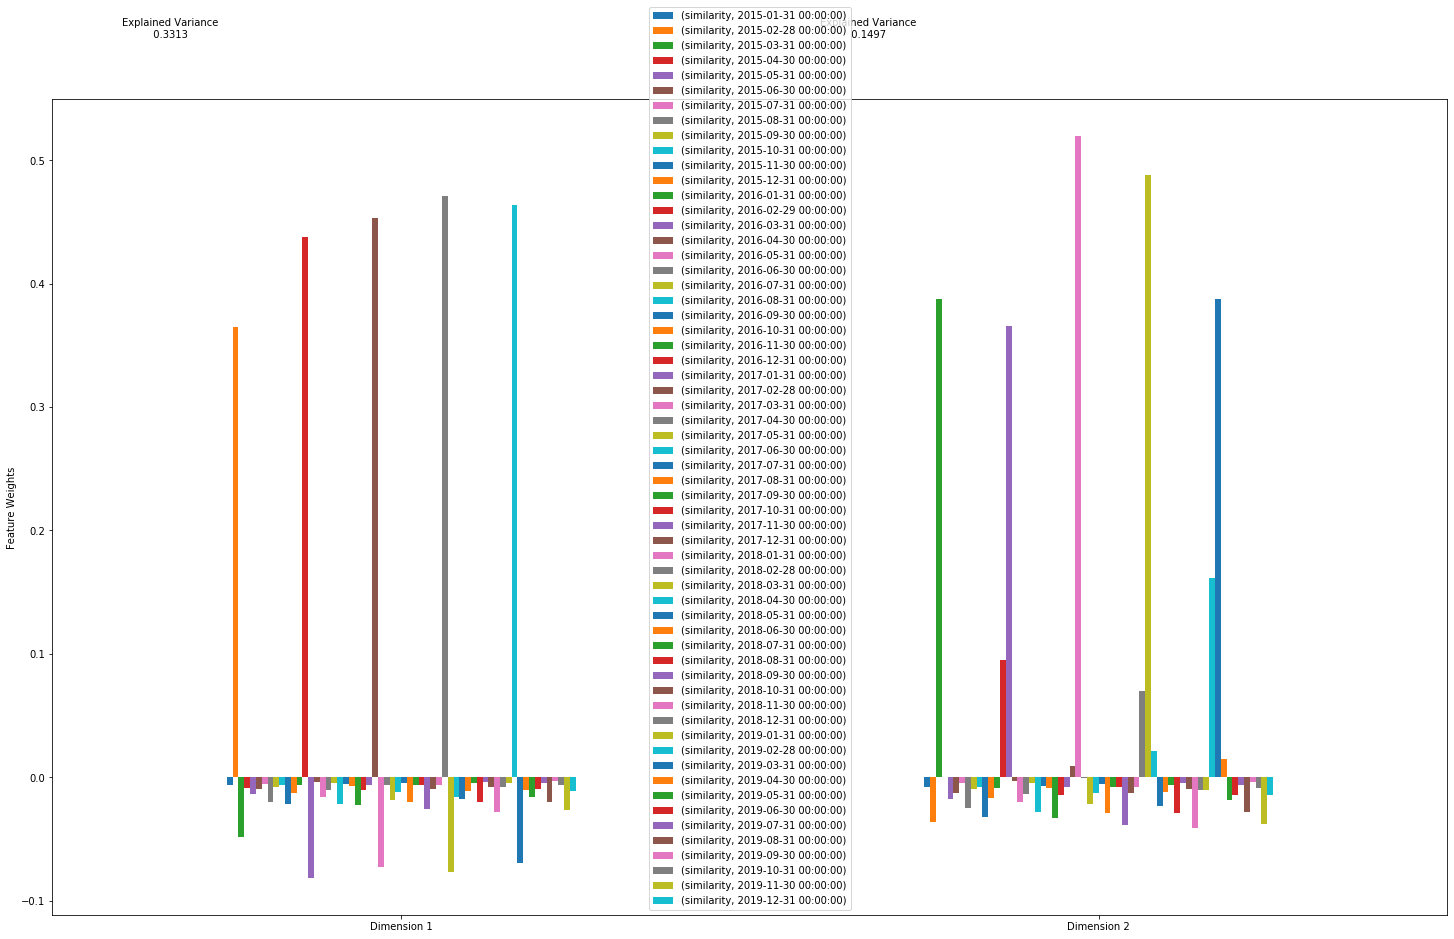

In [736]:
pca_model = PCA(n_components = 2, svd_solver = "full")
reduced_data = pca_model.fit_transform(norm_data)

pca_results(norm_data, pca_model, 5)
# pca_model.explained_variance_ratio_

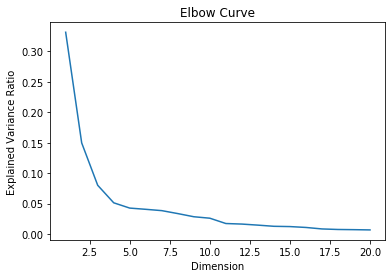

In [737]:
dimension = 20
pca_10dim = PCA(n_components = dimension, svd_solver = "full")
pca_data_10dim = pca_10dim.fit_transform(norm_data)
plt.plot(range(1,dimension+1), pca_10dim.explained_variance_ratio_)
plt.title("Elbow Curve")
plt.xlabel('Dimension')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [738]:
# run kmeans on reduced data
kmeans = KMeans(n_clusters=10)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)
ciks = data_pivot.index

# create DataFrame aligning labels & companies
df = pd.DataFrame({'labels': labels, 'cik': ciks})

# Display df sorted by cluster labels
print(df.sort_values('labels'))

      labels      cik
947        0   874499
2260       0  1426945
2254       0  1421461
2253       0  1420800
2251       0  1420302
...      ...      ...
2612       9  1669162
1954       9  1262039
2303       9  1459200
2016       9  1289945
2490       9  1590877

[2702 rows x 2 columns]


In [739]:
industry_groups = pd.merge(left = df, right = mapping[["cik","conm","industry"]], on="cik")

In [740]:
cluster_agg_data = industry_groups.groupby(['labels', 'industry']).agg(count = ('cik', 'count'))
pd.pivot_table(cluster_agg_data, 
                        values=['count'],
                        index=['industry'],
                        columns=['labels'],
                        aggfunc=np.sum,
                        fill_value=0)

count                            
labels                                  0   1  2  3  4  5  6  7  8  9
industry                                                             
Aerospace & Defense                     1  22  1  1  8  3  1  1  4  0
Air Freight & Logistics                 2   3  0  1  4  0  0  1  0  0
Airlines                                2   6  0  1  5  0  1  0  0  0
Auto Components                         3   5  0  3  7  1  2  0  0  1
Automobiles                             2   7  0  0  2  0  0  0  0  0
...                                   ...  .. .. .. .. .. .. .. .. ..
Thrifts & Mortgage Finance              0   6  2  1  0  5  1  0  1  1
Tobacco                                 1   3  0  0  2  1  0  0  1  0
Trading Companies & Distributors        1   7  1  2  4  2  1  0  0  0
Water Utilities                         1   0  0  1  2  0  0  0  0  0
Wireless Telecommunication Services     0  10  1  0  1  0  1  1  1  1

[69 rows x 10 columns]

In [741]:
export_data = pd.merge(left = industry_groups, right = pd.DataFrame(reduced_data), right_index=True, left_index=True)
export_data = export_data.rename(columns={0:"Coord1", 1:"Coord2"})
export_data

,labels,cik,conm,industry,Coord1,Coord2
0,1,1750,AAR CORP,Aerospace & Defense,-0.199372,-0.109032
1,4,1800,ABBOTT LABORATORIES,Health Care Equipment & Supplies,-0.204814,-0.115122
2,1,2034,ACETO CORP,Health Care Providers & Services,0.281037,-0.043422
3,1,2135,AFFILIATED COMPUTER SERVICES,IT Services,-0.211653,-0.125571
4,4,2488,ADVANCED MICRO DEVICES,Semiconductors & Semiconductor Equipment,-0.199372,-0.109032
...,...,...,...,...,...,...
2696,1,1754301,FOX CORP,Media,-0.199372,-0.109032
2697,1,1755672,CORTEVA INC,Chemicals,-0.199372,-0.109032
2698,1,1760965,KONTOOR BRANDS INC,"Textiles, Apparel & Luxury Goods",-0.199372,-0.109032
2699,1,1766400,PENNANT GROUP INC (THE),Health Care Providers & Services,-0.199372,-0.109032


In [742]:
export_data.to_excel("2015-2020Similarity2D.xlsx")
export_data.to_csv("2015-2020Similarity2D.csv", index=False)

<Figure size 432x288 with 0 Axes>

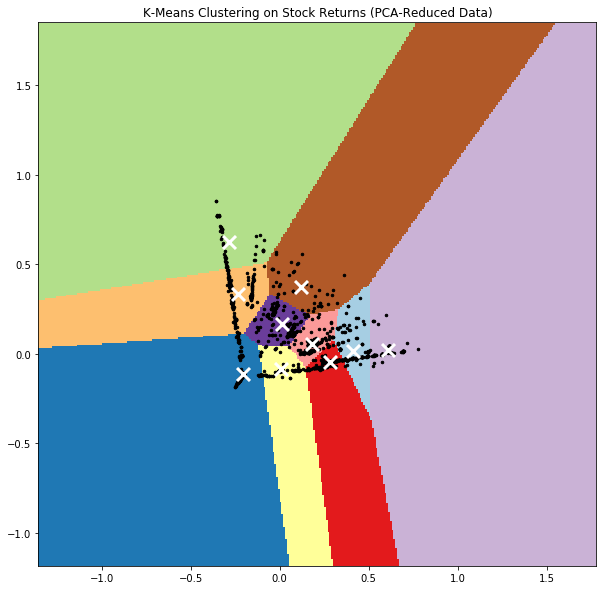

In [743]:
# Define step size of mesh
h = 0.01

# plot the decision boundary
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:,0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# define colorplot
cmap = plt.cm.Paired

# plot figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z, interpolation='nearest',
 extent = (xx.min(), xx.max(), yy.min(), yy.max()),
 cmap = cmap,
 aspect = 'auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)


# plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
 marker='x', s=169, linewidth=3,
 color='w', zorder=10)

plt.title('K-Means Clustering on Stock Returns (PCA-Reduced Data)')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()